# Optimizing Ski Students and Teachers Pickup

**Develop an algorithm to solve the problem outlined below.**

Your code must solve all instances provided in the [GitHup repository of the course](https://github.com/Daddeee/FRO_Labs_22-23/tree/master/big-project) in **less than 30 minutes** of execution time.

The last cell of your notebook should print the results of your algorithm as if it was a csv file with 3 columns:

*   "Id": the ID of the instance (1, 2, 3, ..., 8)
*   "Obj": the objective function value obtained
*   "Time": the execution time in seconds.

**This notebook already contains the skeleton of code to produce the correct output**. 
You only have to include your solution in the "solve" function below.

Once you have completed your code, you can upload it to the [big-project WeBeep assignment](https://webeep.polimi.it/mod/assign/view.php?id=171992).

For instances 1, 2, 3 and 4, we provide you with the optimal objective function value ([here on GitHub](https://github.com/Daddeee/FRO_Labs_22-23/tree/master/big-project/solutions)). You can compare the output of your algorithm with these results to understand how well you are performing.

## General info
*   groups of max 3 students
*   deadline at 09/06/2023 23:59 CET
*   NO pre-coded libraries or algorithms.

## Evaluation
*   4 lab points if you deliver something that works.
*   10 points based on the quality of your solutions, measured in gap w.r.t. optimal solutions and execution times.
*   Execution times will be re-examined on a random basis.

## Problem

A ski school provides transportation for its students.

The ski school operates a fleet of $k$ buses, each capable of transporting a maximum of $C$ students. Based on the enrollments for the upcoming winter, the school expects to pick up its students from a set of $n$ neighboring towns. Each town has $d_i$ students and must be visited exactly once by one of the buses.

The school has a total of $k$ teachers (one per bus). Each day, some teachers (not necessarily all $k$ of them) will drive a bus to pickup all students. When an instructor is not driving a bus, he must be picked up by one of the other buses. The ski school pays a fixed daily fee for each instructor that drives a bus, equivalent to the distance between his hometown and the school.

To ensure efficient transportation, a bus visiting a town must pick up all of its students, and the total number of students picked up by each bus must not exceed its capacity. Additionally, it is mandatory for each bus to start and end its route at the ski school.

Your goal is to plan the pickup routes of the ski school with the goal of minimizing the total distance travelled by buses and the fixed cost of each teacher that is driving a bus.


## Instance

Each instance is a ".json" file containing all information needed to solve the problem. Its fields are:

*   *town_coordinates*: the coordinates $(x,y) \in [0,100]^2$ of each town,
*   *depot_coordinates*: the coordinates $(x,y) \in [0,100]^2$ of the depot,
*   *teacher_coordinates*: the coordinates $(x,y) \in [0,100]^2$ of the hometown of each teacher,
*   *students_per_town*: the number of students waiting in each town.
*   *bus_capacity*: the maximum number of people that can travel on each bus.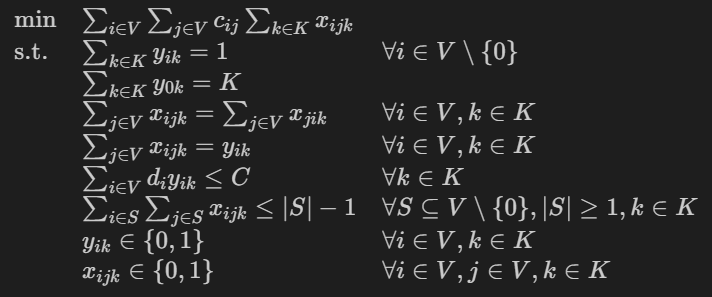


In [2]:
# Run this cell to download all instances from the GitHub repository.
# It also downloads results for instances 1, 2, 3, and 4.

# Clean files if present
!rm instance_1.json
!rm result_1.txt
!rm instance_2.json
!rm result_2.txt
!rm instance_3.json
!rm result_3.txt
!rm instance_4.json
!rm result_4.txt
!rm instance_5.json
!rm instance_6.json
!rm instance_7.json
!rm instance_8.json

# Download directly from Github
!wget https://raw.githubusercontent.com/Daddeee/FRO_Labs_22-23/master/big-project/instances/instance_1.json
!wget https://raw.githubusercontent.com/Daddeee/FRO_Labs_22-23/master/big-project/instances/instance_2.json
!wget https://raw.githubusercontent.com/Daddeee/FRO_Labs_22-23/master/big-project/instances/instance_3.json
!wget https://raw.githubusercontent.com/Daddeee/FRO_Labs_22-23/master/big-project/instances/instance_4.json
!wget https://raw.githubusercontent.com/Daddeee/FRO_Labs_22-23/master/big-project/instances/instance_5.json
!wget https://raw.githubusercontent.com/Daddeee/FRO_Labs_22-23/master/big-project/instances/instance_6.json
!wget https://raw.githubusercontent.com/Daddeee/FRO_Labs_22-23/master/big-project/instances/instance_7.json
!wget https://raw.githubusercontent.com/Daddeee/FRO_Labs_22-23/master/big-project/instances/instance_8.json

!wget https://raw.githubusercontent.com/Daddeee/FRO_Labs_22-23/master/big-project/results/result_1.txt
!wget https://raw.githubusercontent.com/Daddeee/FRO_Labs_22-23/master/big-project/results/result_2.txt
!wget https://raw.githubusercontent.com/Daddeee/FRO_Labs_22-23/master/big-project/results/result_3.txt
!wget https://raw.githubusercontent.com/Daddeee/FRO_Labs_22-23/master/big-project/results/result_4.txt

results = [458.2772924952991, 712.5038409416292, 414.8740205020168, 503.4909956314156]

rm: cannot remove 'instance_1.json': No such file or directory
rm: cannot remove 'result_1.txt': No such file or directory
rm: cannot remove 'instance_2.json': No such file or directory
rm: cannot remove 'result_2.txt': No such file or directory
rm: cannot remove 'instance_3.json': No such file or directory
rm: cannot remove 'result_3.txt': No such file or directory
rm: cannot remove 'instance_4.json': No such file or directory
rm: cannot remove 'result_4.txt': No such file or directory
rm: cannot remove 'instance_5.json': No such file or directory
rm: cannot remove 'instance_6.json': No such file or directory
rm: cannot remove 'instance_7.json': No such file or directory
rm: cannot remove 'instance_8.json': No such file or directory
--2023-05-23 11:45:19--  https://raw.githubusercontent.com/Daddeee/FRO_Labs_22-23/master/big-project/instances/instance_1.json
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connect

In [1]:
!pip install mip

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.3/15.3 MB 25.3 MB/s eta 0:00:00


In [17]:
import json
import math
import datetime
import numpy as np
import networkx as nx
import mip
import matplotlib.pyplot as plot

# Reads a .json instance and returns it in a dictionary
def load_instance(filename):
  with open(filename, 'r') as f:
    data = json.load(f)
  return data

# Reads a .txt result and returns it
def load_result(filename):
  try:
    with open(filename, 'r') as f:
      return float(f.read())
  except FileNotFoundError:
    return None

def solve(instance):
  # TODO INSERT HERE YOUR ALGORITHM
  depot_coor = instance["depot_coordinates"]
  town_coor = instance["town_coordinates"] # set of towns without the ski resort.
  teacher_coor = instance["teacher_coordinates"]
  d = instance["students_per_town"]
  C = instance["bus_capacity"]

  tot_coor = []
  tot_coor.append(depot_coor[0])
  for i in range(len(town_coor)):
    tot_coor.append(town_coor[i])
  for i in range(len(teacher_coor)):
    tot_coor.append(teacher_coor[i])

  N_K = len(tot_coor)

  N = len(town_coor)+1
  k = len(teacher_coor) # number of teachers

  V = range(N_K)
  V1 = V[1:]
  V0 = V[:-1]
  K = range(k)  # set of buses.

  c_btw_towns = np.array([[math.sqrt(np.sum((tot_coor[i][0] - tot_coor[j][0])**2+(tot_coor[i][1] - tot_coor[j][1])**2)) for i in V] for j in V])
  
  for i in K:
    d.append(1)

  # MODEL
  m = mip.Model()

  # VARIABLES
  x_ijk = [[[m.add_var(var_type=mip.BINARY) for k in K] for j in V] for i in V]  # 1 if the bus k drives through the town i and j
  y_ik = [[m.add_var(var_type=mip.BINARY) for k in K] for i in V]                # 1 if the bus k visits the town i
  t_k = [m.add_var(var_type=mip.BINARY) for k in K]                              # 1 if the teacher k drives the bus

  # OBJECTIVE FUNCTION
  m.objective = mip.minimize(mip.xsum(mip.xsum(c_btw_towns[i][j] * mip.xsum(x_ijk[i][j][k] for k in K) for j in V) for i in V)+mip.xsum(t_k[k]*c_btw_towns[0][k] for k in K)) 

  # CONSTRAINTS
    # Constraint 1 -> each town must be visited exactly once by one of the k buses   
  for i in V0:
    m.add_constr(mip.xsum(y_ik[i][k] for k in K) == 1)

    # Constraint 2 -> all k buses leave from the ski school (starting point)
  m.add_constr(mip.xsum(y_ik[0][h] for h in K) == k)

    # Constraint 3 & 4 ->  if the bus k visits the town i, it must pass through that town only once
  for i in V:
    for k in K:
      m.add_constr(mip.xsum(x_ijk[i][j][k] for j in V) == mip.xsum(x_ijk[j][i][k] for j in V))
      m.add_constr(mip.xsum(x_ijk[i][j][k] for j in V) == y_ik[i][k])

    # Constraint 5 -> each bus is able to tranport at most C students
  for k in K:
    m.add_constr(mip.xsum(d[i]*y_ik[i][k] for i in V0) <= C)

    # Constraint 6 -> each town must be visited only once by a bus k, except the ski school
  from itertools import chain, combinations
  powerset = list(chain.from_iterable(combinations(V0, r) for r in V0))

  for S in powerset:
    for k in K:
      if len(S) > 0 and len(S) <= N_K:
          m.add_constr(mip.xsum(mip.xsum(x_ijk[i][j][k] for j in S) for i in S) <= len(S)-1)

    # Constraint 7 -> bus k doesn't drive through a town i, which it doesn't visit according to y_ik
  for j in V1:
    for k in K:
      m.add_constr(mip.xsum(x_ijk[i][j][k] for i in V) == 2*y_ik[j][k])

    # Constraint 8 -> bus k makes a route only if it is driven by the teacher k
  for k in K:
    m.add_constr(mip.xsum(mip.xsum(x_ijk[i][j][k] for i in V) for j in range(i)) <= t_k[k]*(N_K+100))

    # Constraint 9 -> no bus picks up a teacher that is a driver
  for i in range(N,N_K):
    m.add_constr(mip.xsum(mip.xsum(x_ijk[i][j][k] for j in range(i+1)) for k in K) == 2*(1-t_k[i-N]))

  m.optimize()

  return m.objective_value

insts = [1]
outputs = []
times = []

for i in insts:
  instance_name = "instance_{}.json".format(i)
  results_name = "result_{}.txt".format(i)
  inst = load_instance(instance_name)

  # start and end are used to measure execution time
  start = datetime.datetime.now()
  
  obj = solve(inst)
  
  end = datetime.datetime.now()
  time = (end - start).total_seconds()

  print("[{}] Found solution with obj: {}".format(i, obj))
  print("[{}] Elapsed time: {} s".format(i, time))

  res = load_result(results_name)
  print(res)
  if res is not None:
    gap = 100 * (obj - res) / res
    print("[{}] Gap: {}".format(i, gap))

  #if i<=3:
    #if results[i] is not None:
      #gap = 100 * (obj - results[i]) / results[i]
      #print("[{}] Gap: {}".format(i, gap))

 

  outputs.append(obj)
  times.append(time)

print("Id,Obj,Time")
for i in range(len(insts)):
  print(insts[i], outputs[i], times[i])

[1] Found solution with obj: None
[1] Elapsed time: 0.147989 s
None
Id,Obj,Time
1 None 0.147989
